# Elegibilidade para cartão de crédito - EDA e modelagem

## Passos iniciais

### Ferramentas utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import numpy as np

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Conhecendo a base de dados

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [ ]:
#tamanho da base da dados
data.shape

(9709, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [ ]:
#info geral sobre a base de dados
data.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


### Ajustes para análise

In [ ]:
#Ajustes dos nomes das colunas
data.columns = [
    'id',
    'genero',
    'tem_carro',
    'tem_propriedade',
    'tem_telefone_de_trabalho',
    'tem_telefone',
    'tem_email',
    'sem_emprego',
    'num_filhos',
    'num_familia',
    'idade_da_conta',
    'renda_total',
    'idade',
    'tempo_de_trabalho',
    'tipo_de_renda',
    'educacao',
    'estado_civil',
    'moradia',
    'cargo',
    'resultado'
]

data.head()

,id,genero,tem_carro,tem_propriedade,tem_telefone_de_trabalho,tem_telefone,tem_email,sem_emprego,num_filhos,num_familia,idade_da_conta,renda_total,idade,tempo_de_trabalho,tipo_de_renda,educacao,estado_civil,moradia,cargo,resultado
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [ ]:
#Ajustes para idades ficarem no formato inteiro
data['idade'] =  data['idade'].astype(int)
#Asssim como tempo de trabalho
data['tempo_de_trabalho'] = data['tempo_de_trabalho'].astype(int)

In [ ]:
data['genero'] = data['genero'].map({0:'homem',1:'mulher'})

## Análise exploratória de dados (EDA)

### Insights iniciais

#### Gênero

genero  resultado
homem   0            5511
mulher  0            2915
homem   1             812
mulher  1             471
Name: count, dtype: int64


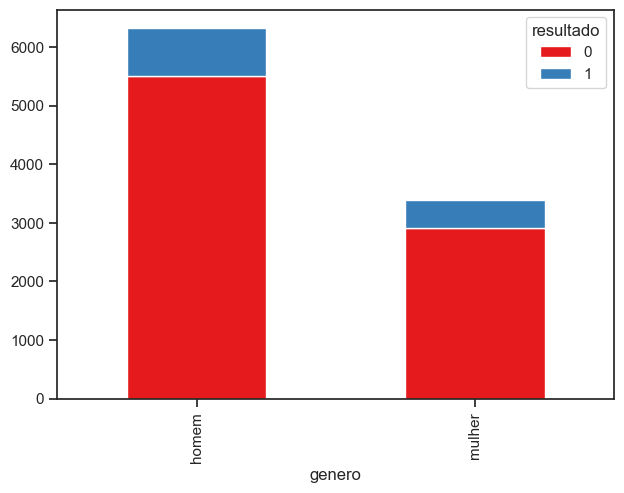

In [ ]:
# Agrupar e contar os dados
divisao_genero_resultado = data.groupby(['genero', 'resultado']).size().unstack()
divisao_genero_resultado.plot(kind='bar', stacked=True)

print(data[['genero','resultado']].value_counts())

#Percentual de homens elegíveis = 812/5511+812 -> 812/6323 -> 12,8%
#Percentual de mulheres elegíveis = 471/2915+471 -> 471/3386 -> 13,9%

#O percentual não parece diferir muito de homens para mulheres, assim, percebe-se que não
#é um fator decisivo.

plt.show()

#### Bens que o cliente possui (carro/propriedade)

categoria                resultado
Com Propriedade          0            3619
Com Carro e Propriedade  0            2083
Sem Carro e Propriedade  0            1698
Com Carro                0            1026
Com Propriedade          1             526
Sem Carro e Propriedade  1             296
Com Carro e Propriedade  1             292
Com Carro                1             169
Name: count, dtype: int64


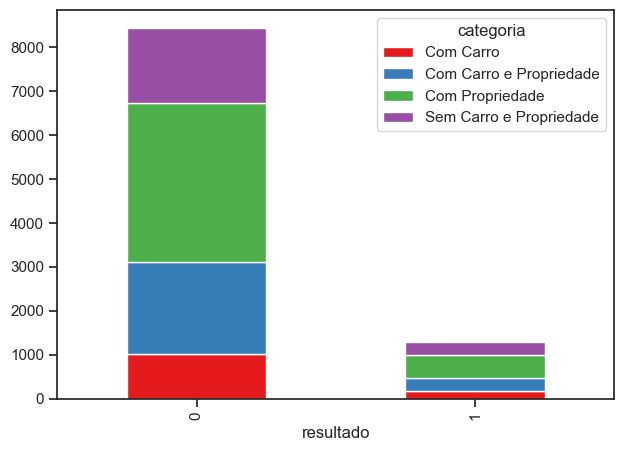

In [ ]:
data['categoria'] = data.apply(lambda x: 'Com Carro e Propriedade' if x['tem_carro'] and x['tem_propriedade'] else
                                      'Com Propriedade' if x['tem_propriedade'] else
                                      'Com Carro' if x['tem_carro'] else
                                      'Sem Carro e Propriedade', axis=1)

bens_resultado = data.groupby(['resultado', 'categoria']).size().unstack()
bens_resultado.plot(kind='bar', stacked=True)

print(data[['categoria','resultado']].value_counts())

#Percentual de clientes com Carro e Propriedade -> 292/2375 -> 12,2%
#Percentual de clientes com Propriedade -> 526/4145 -> 12,6%
#Percentual de clientes com Carro -> 169/1195 -> 14,1%
#Percentual de clientes sem Carro e Propriedade -> 296/2264 -> 13%

#Assim, vemos que apenas as propriedades em si não tem uma relação muito clara com o resultado, vamos em frente com a análise.


#### Número de filhos e tamanho da família.

num_filhos  resultado
0           0            5941
1           0            1627
0           1             878
2           0             722
1           1             259
2           1             130
3           0             112
4           0              17
3           1              14
5           0               5
4           1               1
7           1               1
14          0               1
19          0               1
Name: count, dtype: int64


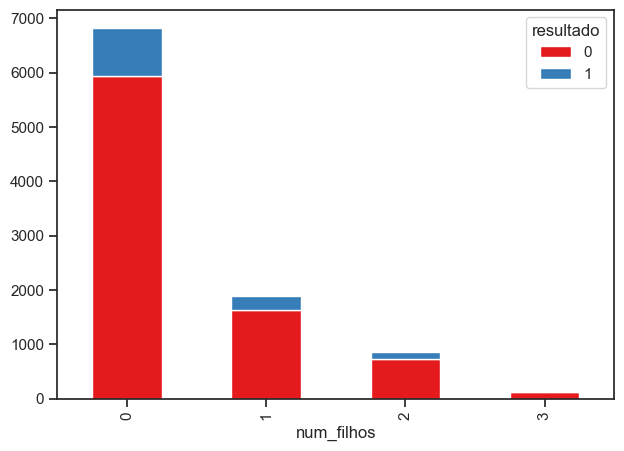

In [ ]:
filtro_filhos = data.query('num_filhos < 4')
filhos_resultado= filtro_filhos.groupby(['num_filhos', 'resultado']).size().unstack()
filhos_resultado.plot(kind='bar', stacked=True)

print(data[['num_filhos','resultado']].value_counts())
#Após 4 filhos o número depenca, assim, compensa filtrar esses outliers para termos uma visualização melhor
#Parece ter sim um impacto sobre a elegibilidade de um cartão, já que variam muito os resultados

#Percentual de clientes elegíveis sem filhos -> 

num_familia  resultado
2            0            4513
1            0            1690
3            0            1416
4            0             680
2            1             670
1            1             257
3            1             219
4            1             122
5            0             104
6            0              17
5            1              13
7            0               4
6            1               1
9            1               1
15           0               1
20           0               1
Name: count, dtype: int64


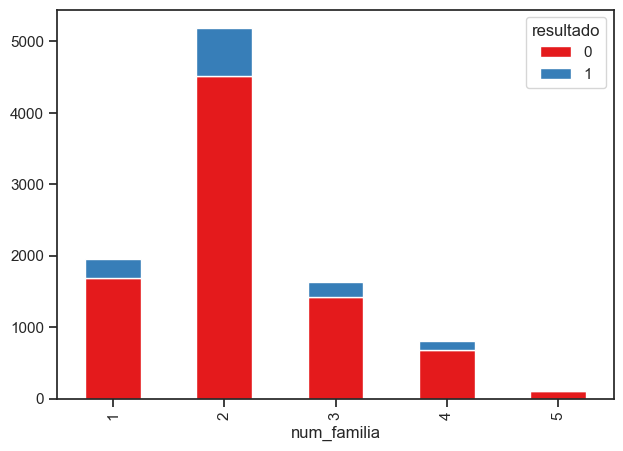

In [ ]:
filtro_membros = data.query('num_familia < 6')
membros_resultado= filtro_membros.groupby(['num_familia', 'resultado']).size().unstack()
membros_resultado.plot(kind='bar', stacked=True)

#Por se tratar quase da mesma coisa (número de filhos), o resultado parece afetar a elegibilidade do cartão de crédito
print(data[['num_familia','resultado']].value_counts())

#### Idade

Média de idade de clientes elegíveis 41.972720187061576
Média de idade de clientes não-elegíveis 43.47958699264182
Mediana de idade de clientes elegíveis 41.0
Mediana de idade de clientes não-elegíveis 43.0


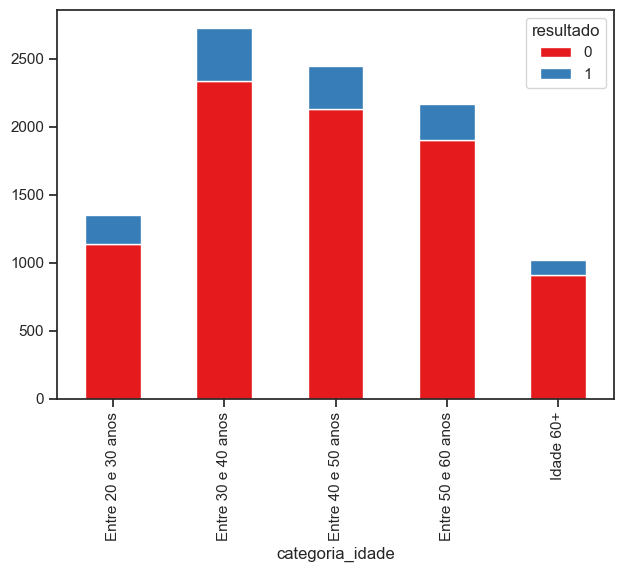

In [ ]:
data['categoria_idade'] = data.apply(lambda x: 'Entre 20 e 30 anos' if 20 <= x['idade'] and x['idade'] < 30 else 
                                      'Entre 30 e 40 anos' if 30 <= x['idade'] and x['idade'] < 40 else
                                      'Entre 40 e 50 anos' if 40 <= x['idade'] and x['idade'] < 50 else
                                      'Entre 50 e 60 anos' if 50 <= x['idade'] and x['idade']< 60 else
                                      'Idade 60+', axis=1)

idade_resultado = data.groupby(['categoria_idade', 'resultado']).size().unstack()
idade_resultado.plot(kind='bar', stacked=True)

idade_elegivel = data[['idade','resultado']].query('resultado == 1')
idade_nao_elegivel = data[['idade','resultado']].query('resultado == 0')

print('Média de idade de clientes elegíveis ' + str(idade_elegivel['idade'].mean()))
print('Média de idade de clientes não-elegíveis ' + str(idade_nao_elegivel['idade'].mean()))

print('Mediana de idade de clientes elegíveis ' + str(idade_elegivel['idade'].median()))
print('Mediana de idade de clientes não-elegíveis ' + str(idade_nao_elegivel['idade'].median()))

#### Renda / Tipo de Renda

<Axes: xlabel='categoria_renda'>

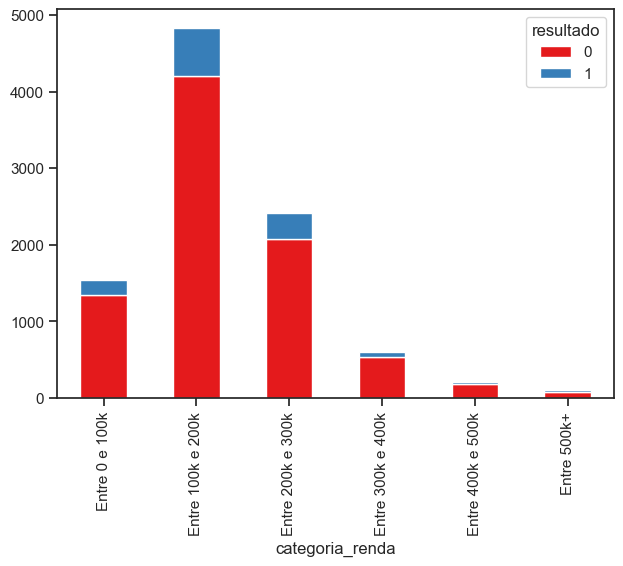

In [ ]:
data['categoria_renda'] = data.apply(lambda x: 'Entre 0 e 100k' if 0 <= x['renda_total'] and x['renda_total'] < 100000 else 
                                      'Entre 100k e 200k' if 100000 <= x['renda_total'] and x['renda_total'] < 200000 else
                                      'Entre 200k e 300k' if 200000 <= x['renda_total'] and x['renda_total'] < 300000 else
                                      'Entre 300k e 400k' if 300000 <= x['renda_total'] and x['renda_total'] < 400000 else
                                      'Entre 400k e 500k' if 400000 <= x['renda_total'] and x['renda_total'] < 500000 else
                                      'Entre 500k+', axis=1)

idade_resultado = data.groupby(['categoria_renda', 'resultado']).size().unstack()
idade_resultado.plot(kind='bar', stacked=True)

<Axes: xlabel='tipo_de_renda'>

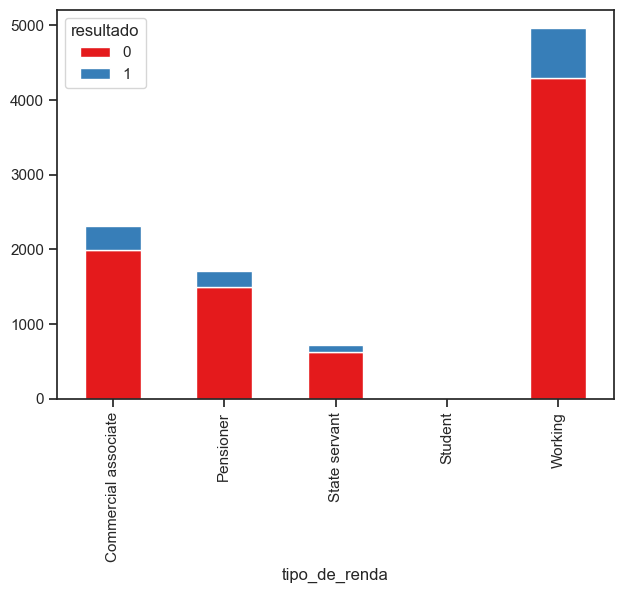

In [ ]:
tipo_de_renda_resultado = data.groupby(['tipo_de_renda', 'resultado']).size().unstack()
tipo_de_renda_resultado.plot(kind='bar', stacked=True)

#Student -> 3 Registros -> 1/3

#### Empregado/Tempo empregado

<Axes: xlabel='sem_emprego'>

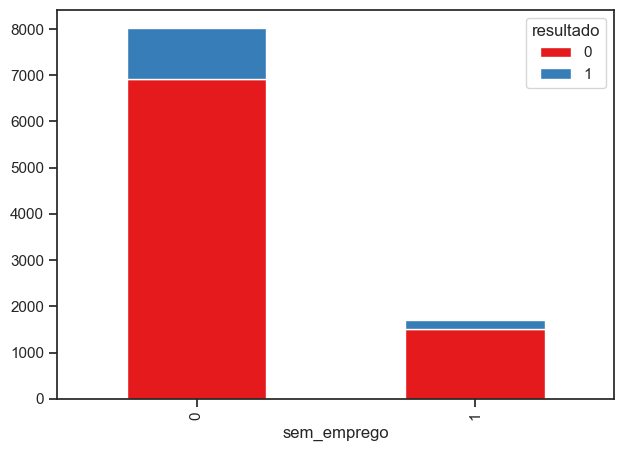

In [ ]:
emprego_resultado = data.groupby(['sem_emprego', 'resultado']).size().unstack()
emprego_resultado.plot(kind='bar', stacked=True)

#Aqui vemos uma relação, em que clientes empregados tem um percentual bem maior que os desempregados

#Percentual de clientes empregados elegiveis
#Percentual de clientes desempregados elégiveis

<Axes: xlabel='tempo_de_trabalho'>

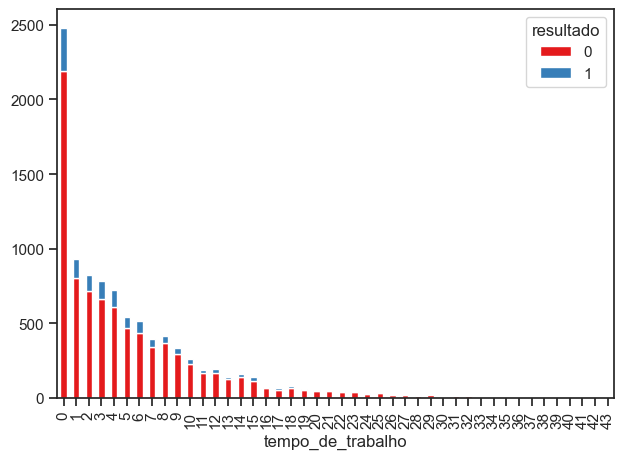

In [ ]:
tempo_de_emprego_resultado = data.groupby(['tempo_de_trabalho', 'resultado']).size().unstack()
tempo_de_emprego_resultado.plot(kind='bar', stacked=True)


#### Educação

<Axes: xlabel='educacao'>

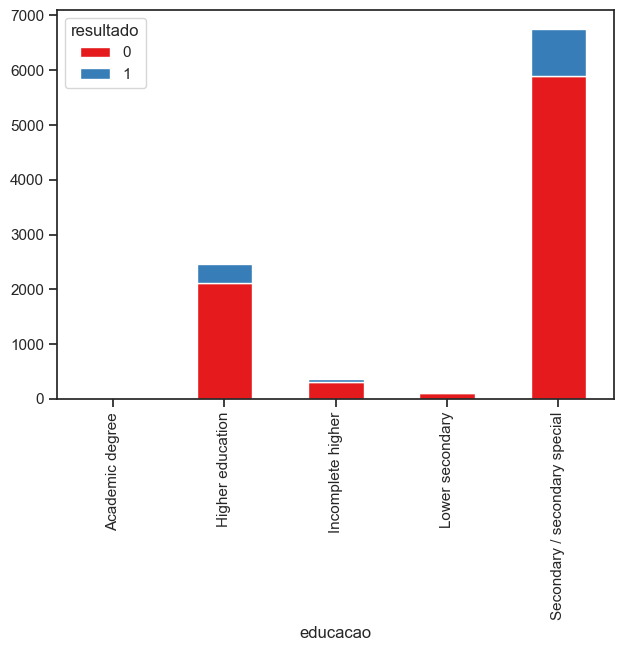

In [ ]:
tempo_de_emprego_resultado = data.groupby(['educacao', 'resultado']).size().unstack()
tempo_de_emprego_resultado.plot(kind='bar', stacked=True)

#### Cargo

<Axes: xlabel='cargo'>

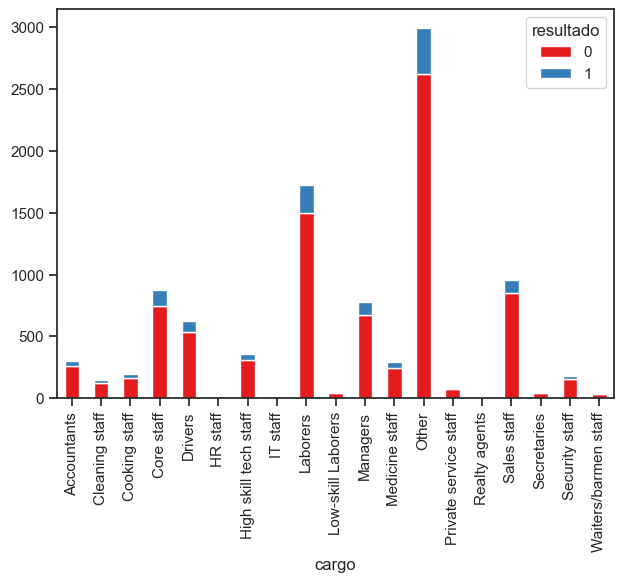

In [ ]:
tempo_de_emprego_resultado = data.groupby(['cargo', 'resultado']).size().unstack()
tempo_de_emprego_resultado.plot(kind='bar', stacked=True)

#### Estado Civil


<Axes: xlabel='estado_civil'>

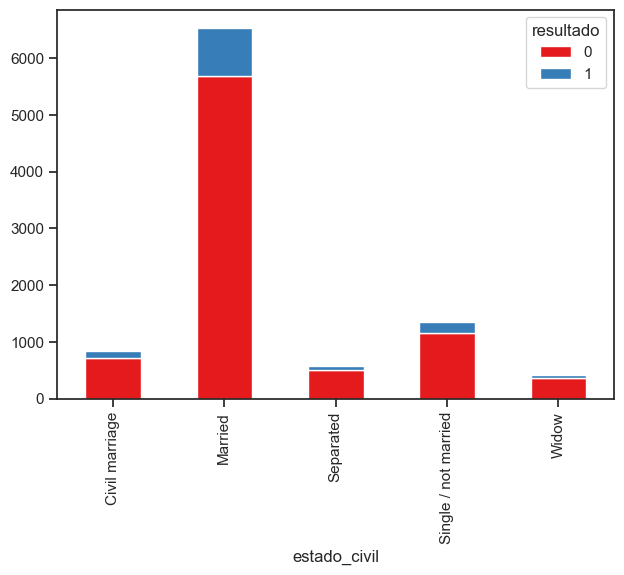

In [ ]:
tempo_de_emprego_resultado = data.groupby(['estado_civil', 'resultado']).size().unstack()
tempo_de_emprego_resultado.plot(kind='bar', stacked=True)

#### Tipo de moradia

<Axes: xlabel='moradia'>

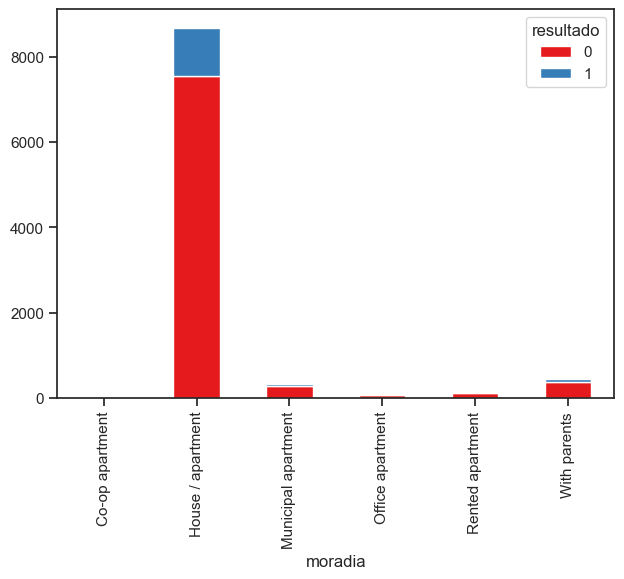

In [ ]:
tempo_de_emprego_resultado = data.groupby(['moradia', 'resultado']).size().unstack()
tempo_de_emprego_resultado.plot(kind='bar', stacked=True)

## Modelagem

Primeiro, vamos selecionar as colunas que serão utilizadas como atributos previsores, verificando fatores como colinearidade. Além de fazer uma breve análise da limpeza a ser feita

    Since nrows is smaller than dataset, loading random sample of 500 rows into pandas...
Shape of your Data Set loaded: (500, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Total_income', 'Age', 'Years_employed']
    Integer-Categorical Columns: ['Num_children', 'Num_family', 'Account_length']
    String-Categorical Columns: ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Co

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Own_car,int64,0.000000,0,0.000000,1.000000,No issue
Own_property,int64,0.000000,0,0.000000,1.000000,No issue
Work_phone,int64,0.000000,0,0.000000,1.000000,No issue
Phone,int64,0.000000,0,0.000000,1.000000,No issue
Email,int64,0.000000,0,0.000000,1.000000,No issue
Unemployed,int64,0.000000,0,0.000000,1.000000,No issue
Num_children,int64,0.000000,1,0.000000,4.000000,Column has 8 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.000000,1,1.000000,6.000000,"Column has 8 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."
Account_length,int64,0.000000,12,0.000000,60.000000,No issue


Total Number of Scatter Plots = 6
All Plots are saved in ./AutoViz_Plots/Target
Time to run AutoViz = 5 seconds 
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.000000,100,5008804.000000,5150479.000000,Possible ID column: drop before modeling step.
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Own_car,int64,0.000000,0,0.000000,1.000000,No issue
Own_property,int64,0.000000,0,0.000000,1.000000,No issue
Work_phone,int64,0.000000,0,0.000000,1.000000,No issue
Phone,int64,0.000000,0,0.000000,1.000000,No issue
Email,int64,0.000000,0,0.000000,1.000000,No issue
Unemployed,int64,0.000000,0,0.000000,1.000000,No issue
Num_children,int64,0.000000,0,0.000000,19.000000,Column has 152 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.000000,0,1.000000,20.000000,"Column has 142 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.0,100,5008804.0,5150479.0,Possible ID column: drop before modeling step.
Gender,int64,0.0,0,0.0,1.0,No issue
Own_car,int64,0.0,0,0.0,1.0,No issue
Own_property,int64,0.0,0,0.0,1.0,No issue
Work_phone,int64,0.0,0,0.0,1.0,No issue
Phone,int64,0.0,0,0.0,1.0,No issue
Email,int64,0.0,0,0.0,1.0,No issue
Unemployed,int64,0.0,0,0.0,1.0,No issue
Num_children,int64,0.0,0,0.0,19.0,Column has 152 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.0,0,1.0,20.0,"Column has 142 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."


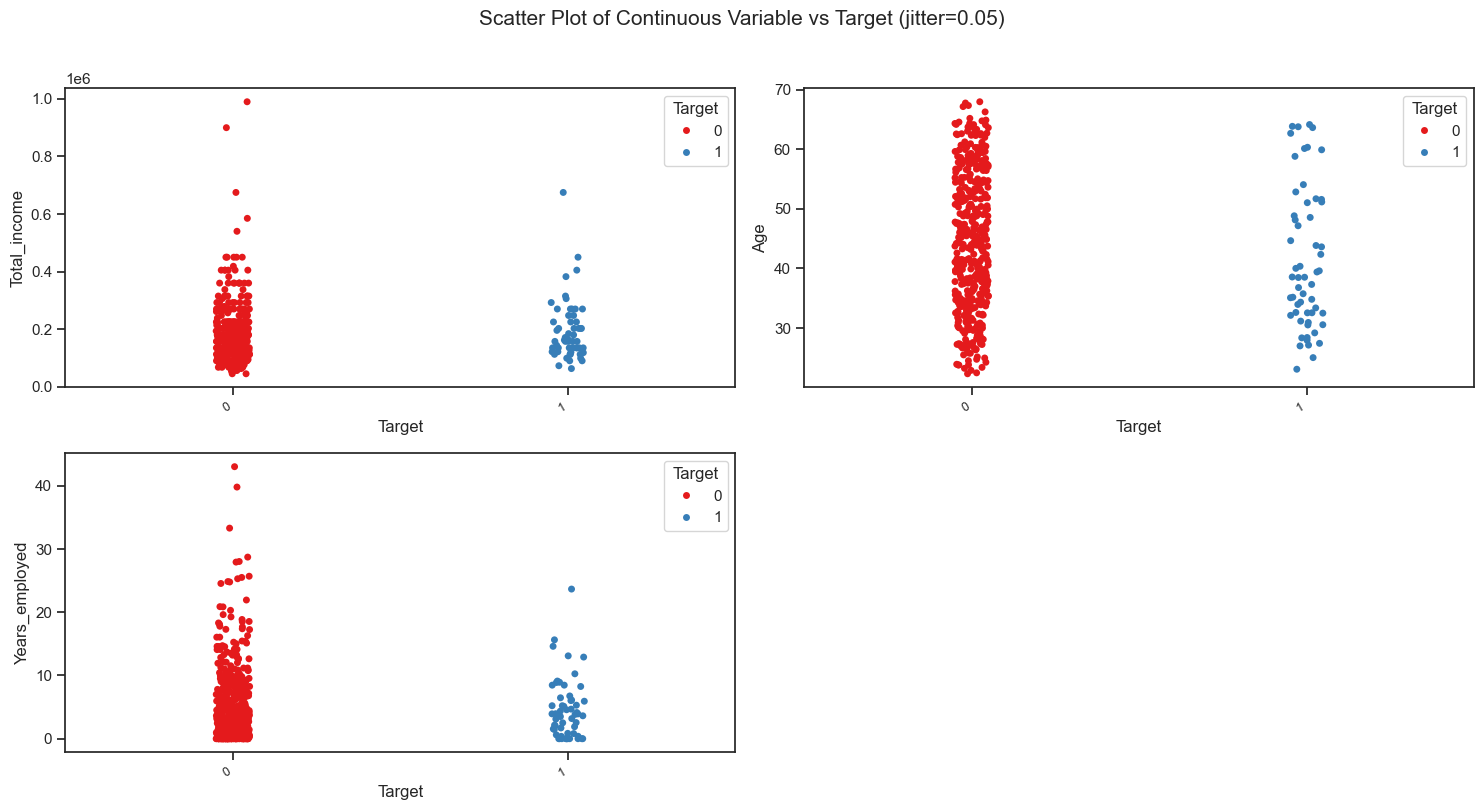

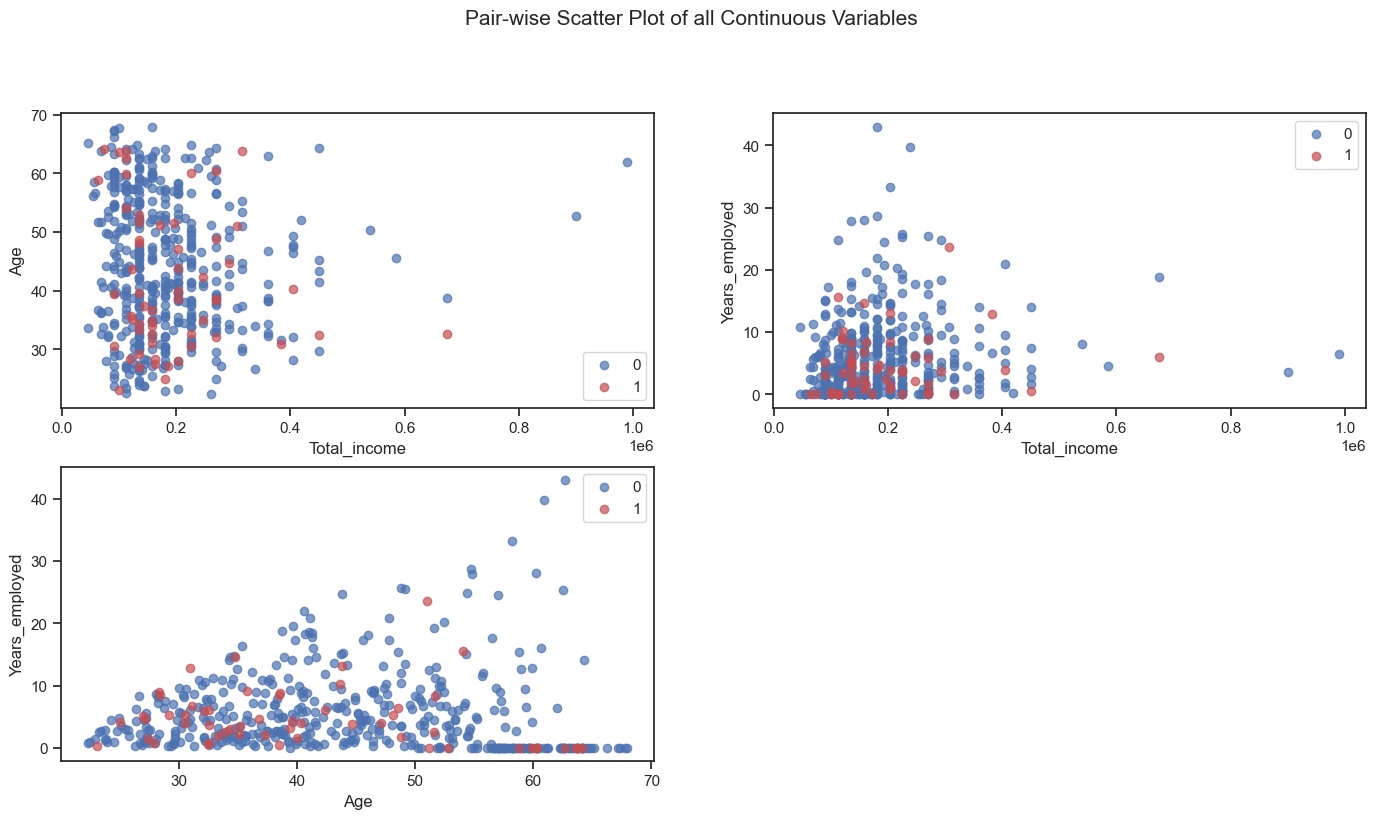

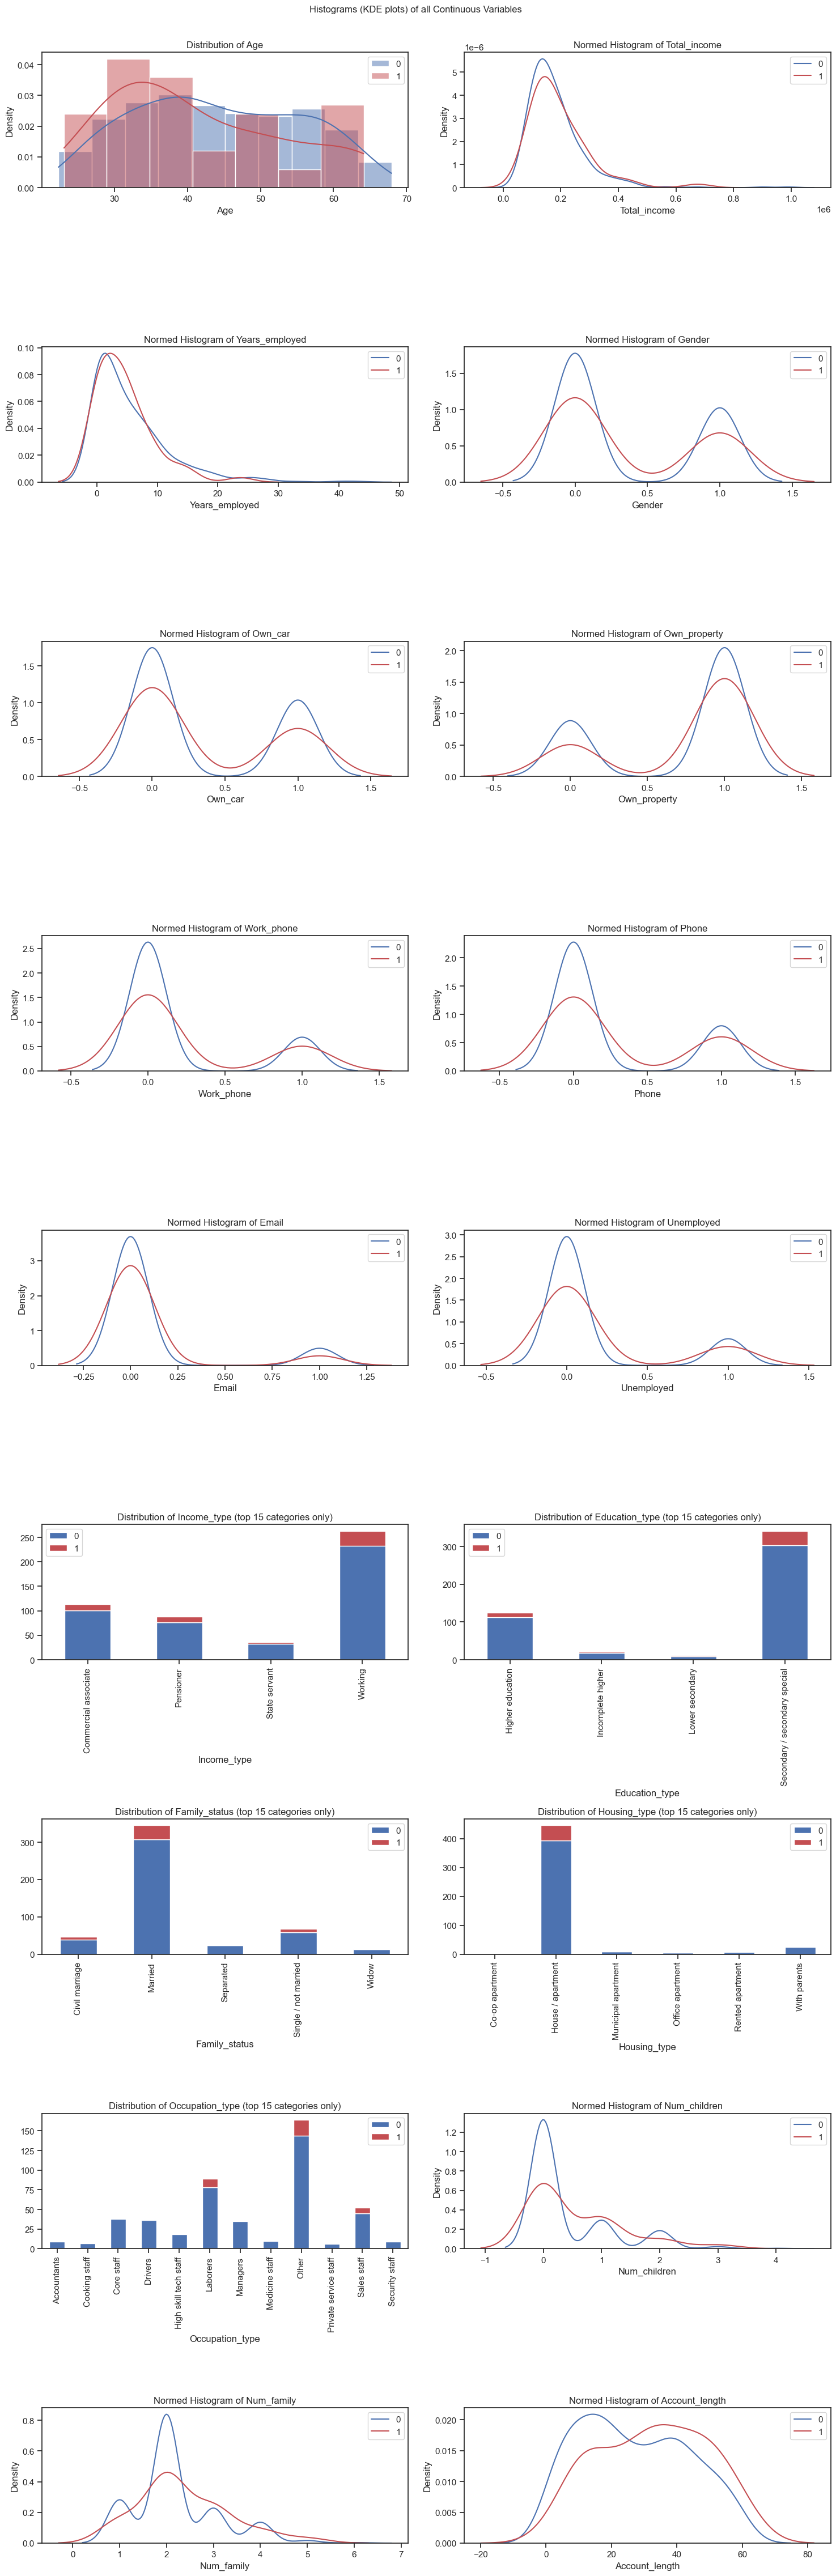

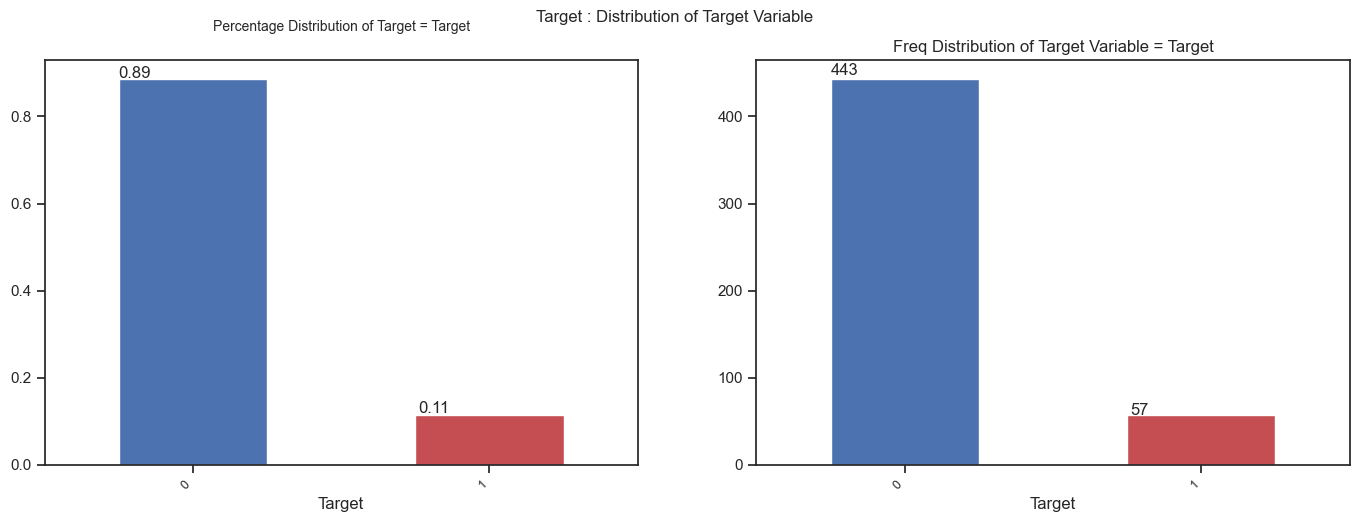

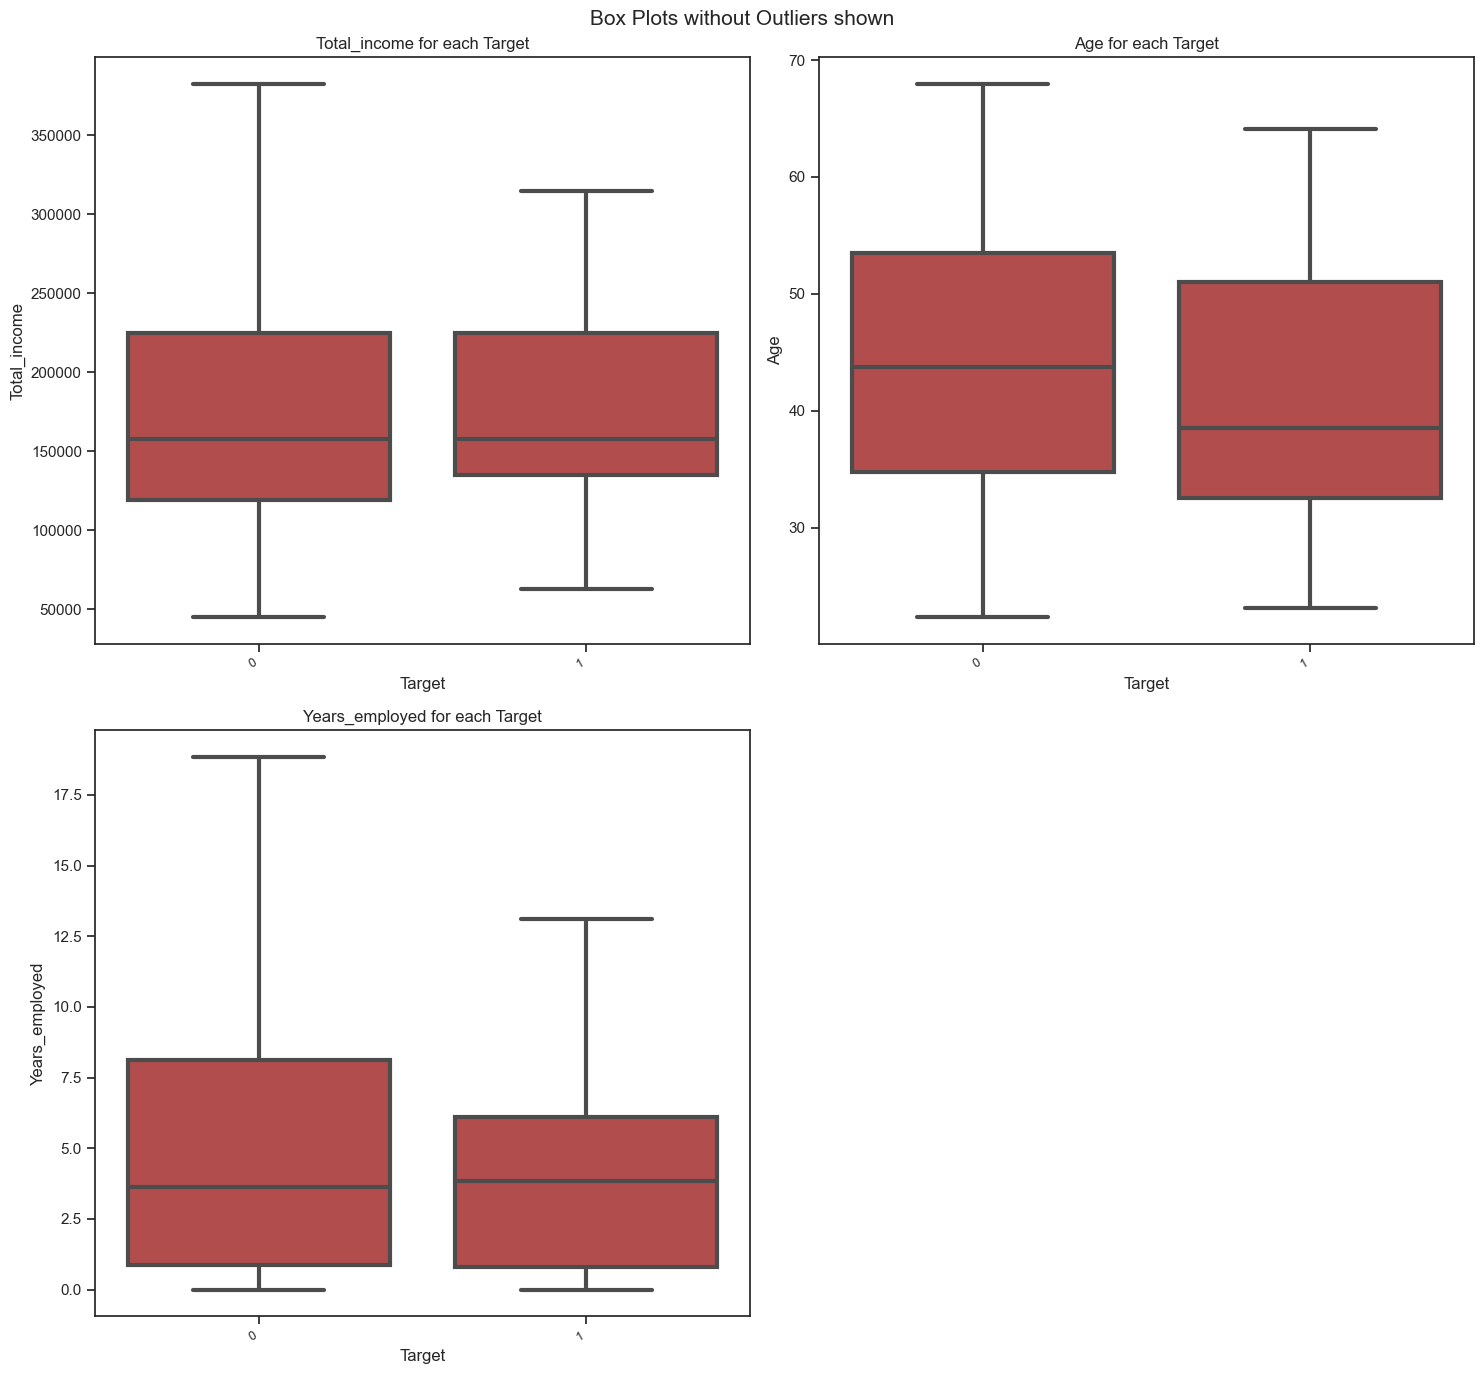

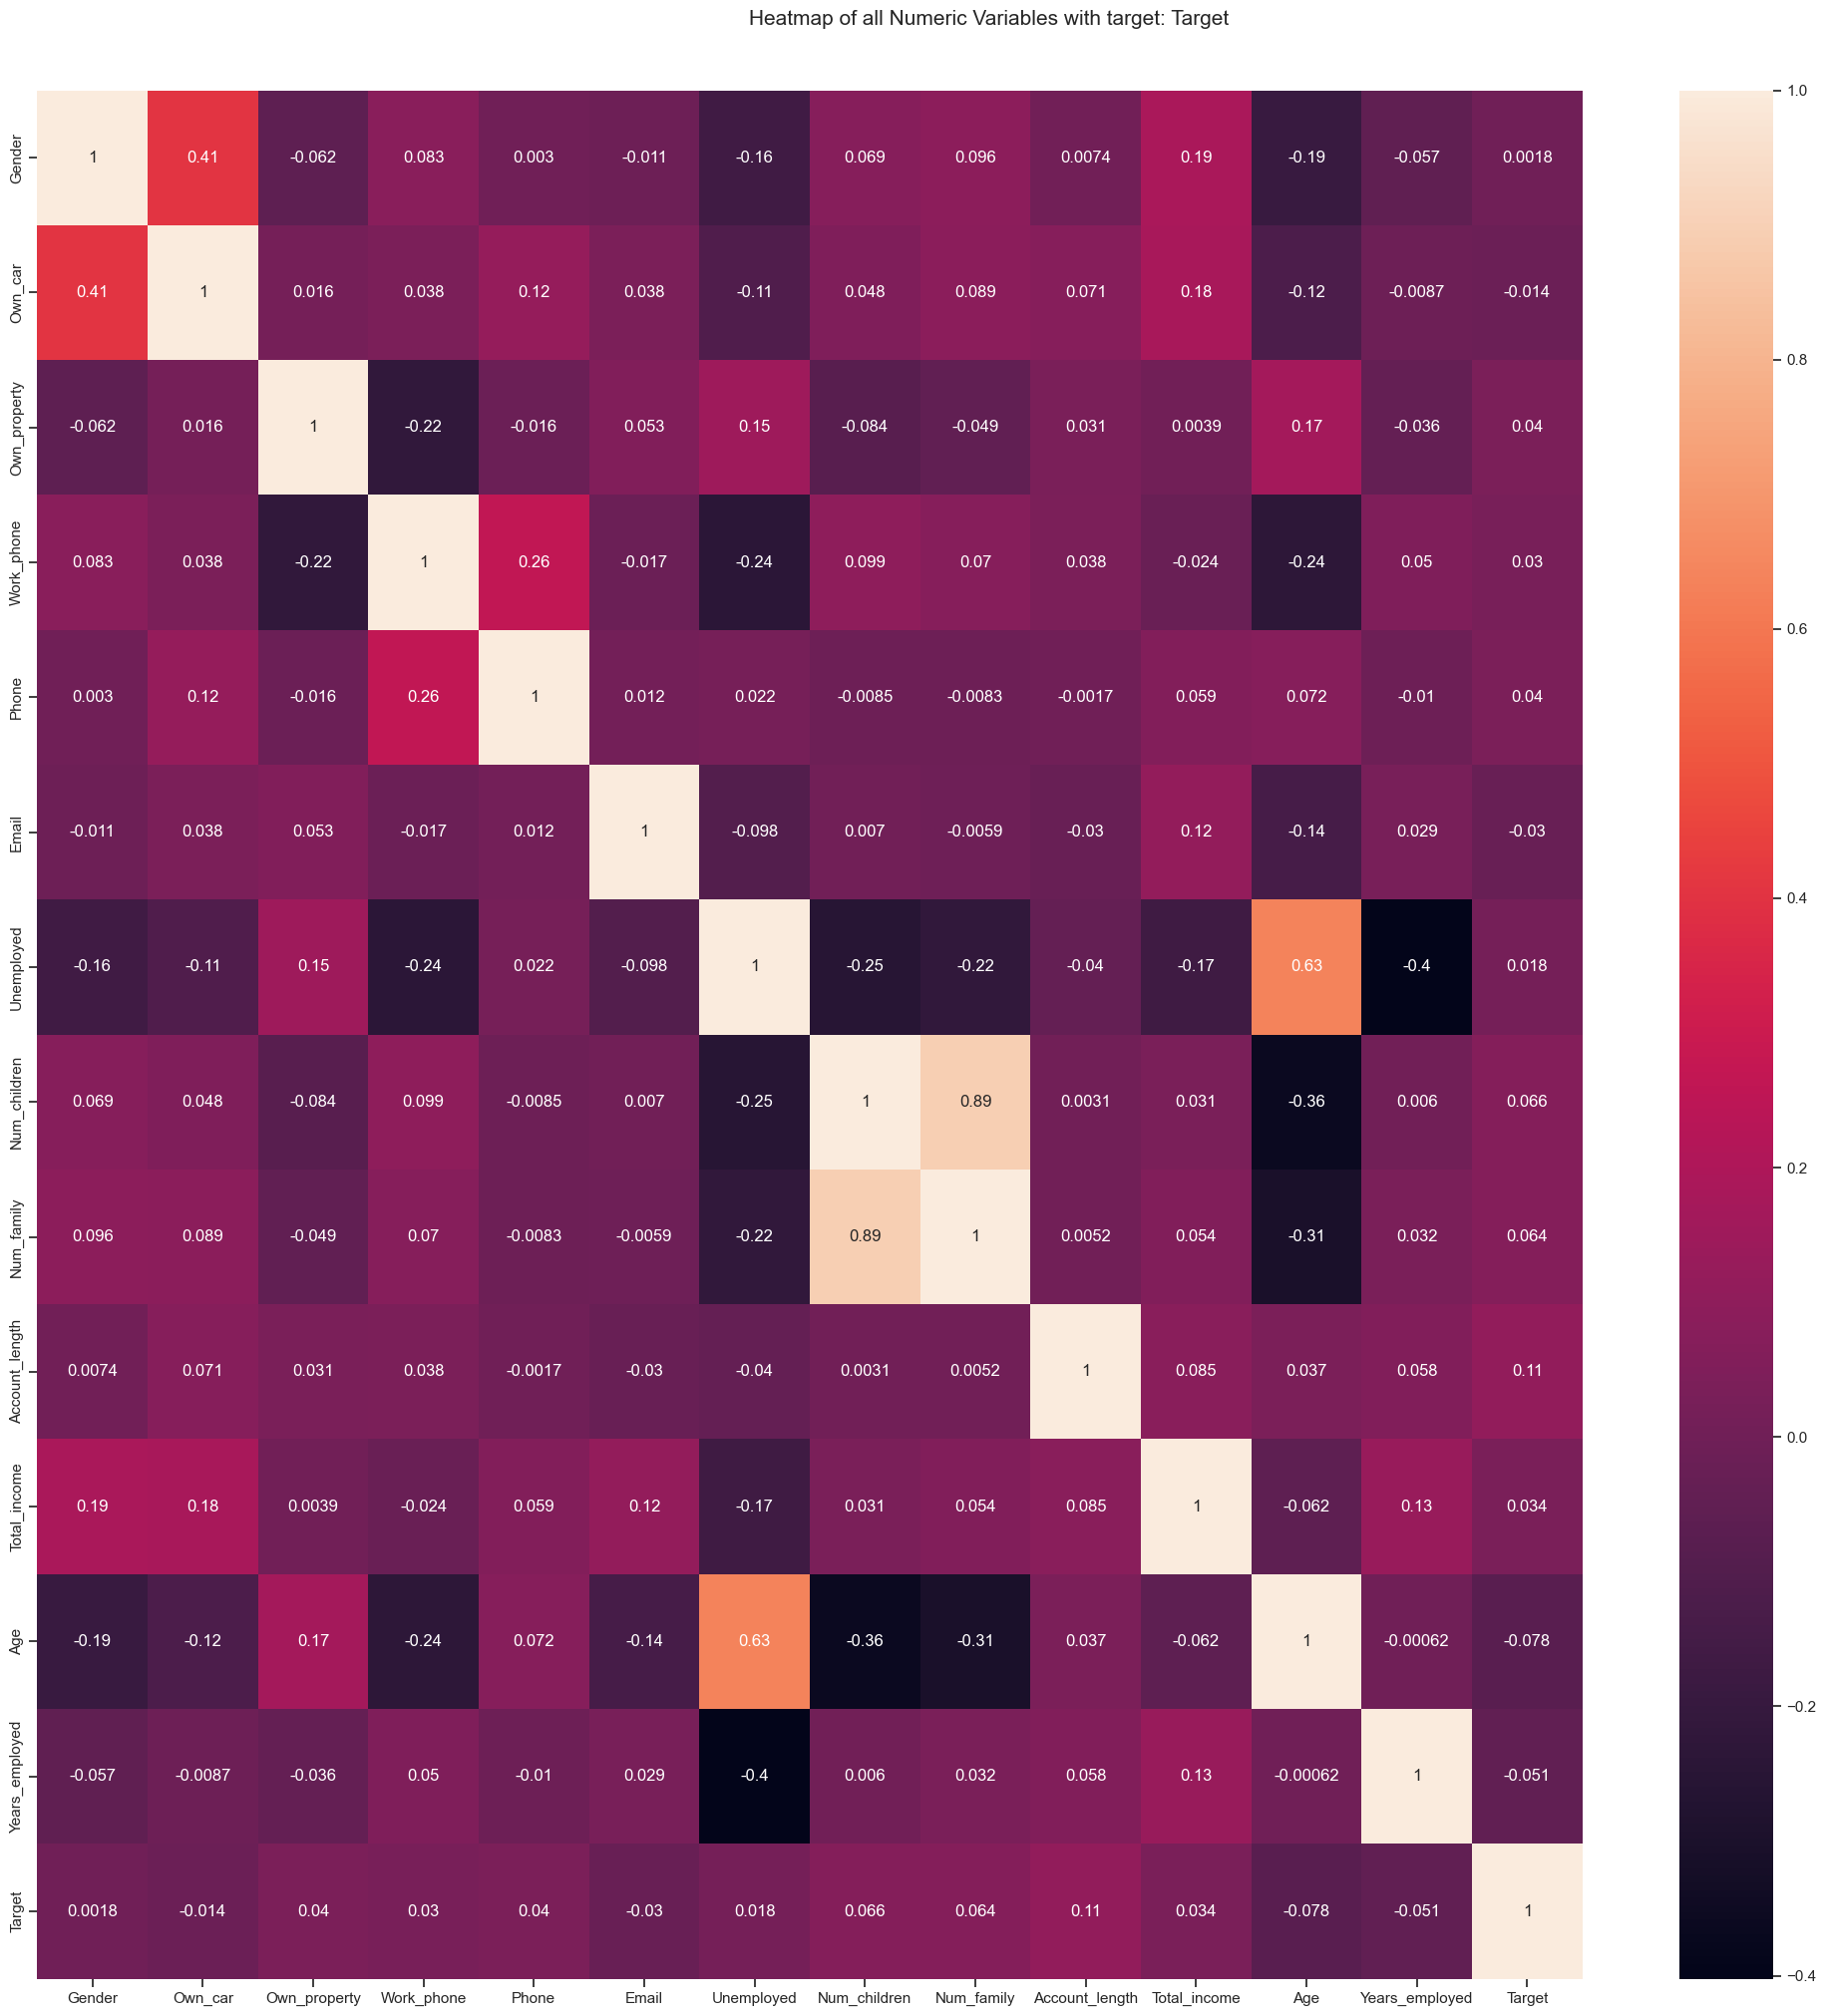

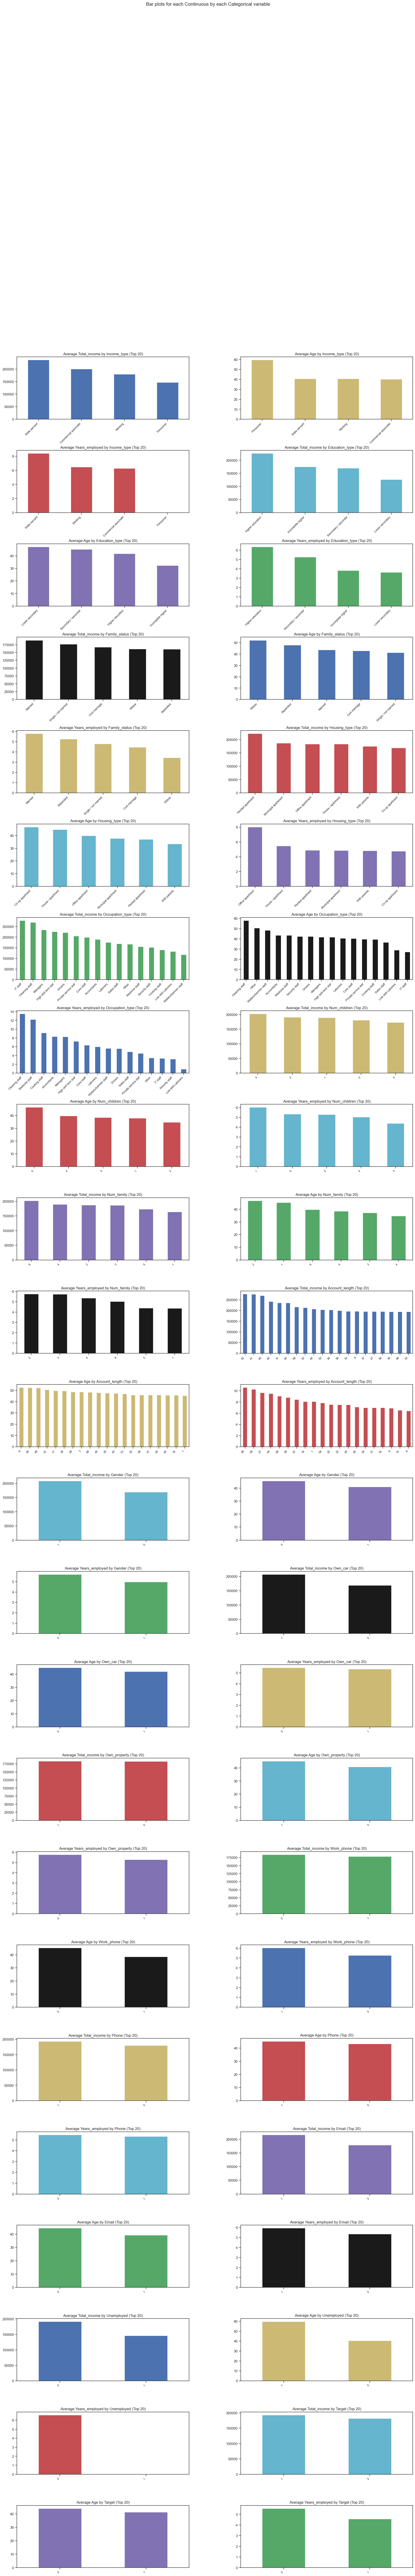

In [ ]:
#Load Autoviz
from autoviz import AutoViz_Class
from autoviz import data_cleaning_suggestions
%matplotlib inline

df = pd.read_csv("dataset.csv")

AV = AutoViz_Class()

filename = df
target_variable = "Target"

dft = AV.AutoViz(
    "",
    sep=",",
    depVar=target_variable,
    dfte=df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=500,
    max_cols_analyzed=20,
    save_plot_dir=None
)

data_cleaning_suggestions(df)